## Assignment 5 -Group 9

Camera calibration using builtin function. 

Hint:
1. Chessboard can be used for imaging  purpose
2. All the pre-processing  required for the purposes are expected to be done

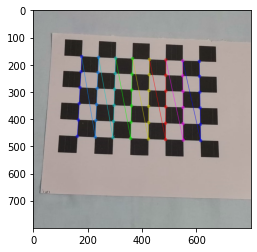

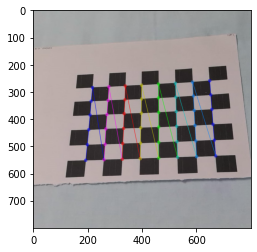

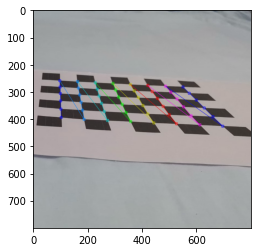

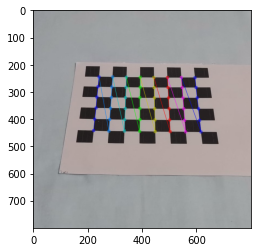

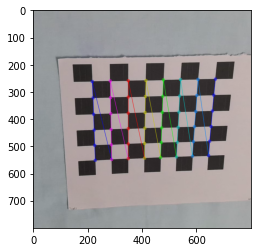

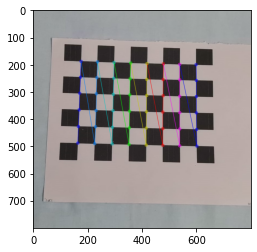

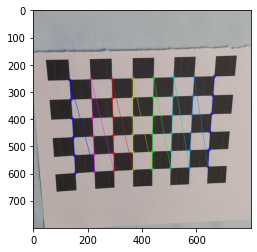

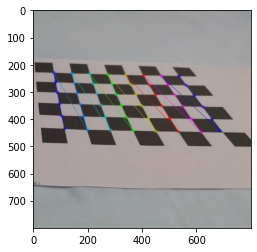

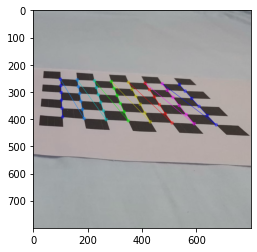

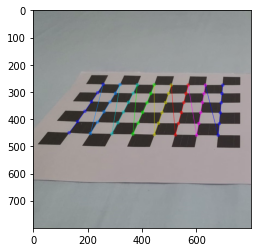

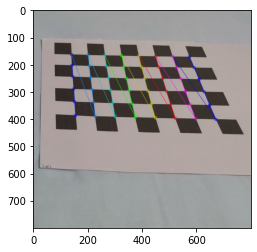

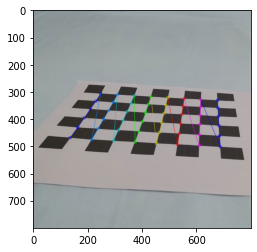

In [ ]:
import cv2 
import numpy as np
import glob
import matplotlib.pyplot as plt

 
sqr_x = 9 # Number of chessboard squares along the x-axis
sqr_y = 7  # Number of chessboard squares along the y-axis
p_x = sqr_x - 1 # Number of interior corners along x-axis
p_y = sqr_y - 1 # Number of interior corners along y-axis
 
# Store vectors of 3D points for all chessboard images (world coordinate frame)
pts_obj = []
 
# Store vectors of 2D points for all chessboard images (camera coordinate frame)
pts_im = []
 
# Set termination criteria. We stop either when an accuracy is reached or when
# we have finished a certain number of iterations.
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
 
# Define real world coordinates for points in the 3D coordinate frame
# Object points are (0,0,0), (1,0,0), (2,0,0) ...., (5,8,0)
pts_obj_3D = np.zeros((p_x * p_y, 3), np.float32)       
 
# These are the x and y coordinates                                              
pts_obj_3D[:,:2] = np.mgrid[0:p_y, 0:p_x].T.reshape(-1, 2) 
 

igs = glob.glob('input/*.jpeg')
     
for fle in igs:
              
    image = cv2.imread(fle)  
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  
 
    # Find the corners on the chessboard
    ret, corners = cv2.findChessboardCorners(gray, (p_y, p_x), None)
     
    if ret == True:
         
      
        # Append object points
        pts_obj.append(pts_obj_3D)
         
        # Find more exact corner pixels       
        corners_2 = cv2.cornerSubPix(gray, corners, (11,11), (-1,-1), criteria)       
        # Append image points
        pts_im.append(corners)
 
        cv2.drawChessboardCorners(image, (p_y, p_x), corners_2, ret)
        plt.imshow(image)
        plt.show()
     
                                                                                            
distorted_image = cv2.imread('input/qq3.jpeg')
 
# Perform camera calibration to return the camera matrix, distortion coefficients, rotation and translation vectors etc 
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(pts_obj, 
                                                    pts_im, 
                                                    gray.shape[::-1], 
                                                    None, 
                                                    None)
 
height, width = distorted_image.shape[:2]
     
# Returns optimal camera matrix and a rectangular region of interest
optimal_camera_matrix, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, 
                                                            (width,height), 
                                                            1, 
                                                            (width,height))
 

undistorted_image = cv2.undistort(distorted_image, mtx, dist, None, 
                                    optimal_camera_matrix)
   
# Crop the image.
x, y, w, h = roi
undistorted_image_cut = undistorted_image[y:y+h, x:x+w]
    
     
im_ = cv2.hconcat([distorted_image,undistorted_image ])
  
cv2.imshow('corrected', im_)
cv2.waitKey(0)
cv2.imshow('corrected-cut', undistorted_image_cut)
cv2.waitKey(0)

cv2.destroyAllWindows() 

cv2.imwrite('output1.jpg',im_)
cv2.imwrite('output2.jpg',undistorted_image_cut)

In [ ]:
print("Optimal Camera matrix:") 
print(optimal_camera_matrix) 
 
print(" Distortion coefficient:") 
print(dist) 
   
print("Rotation Vectors:") 
print(rvecs) 
   
print("Translation Vectors:") 
print(tvecs) 